# Importações e utilidades


In [ ]:
!pip install "deeplabcut[gui,tf]" --quiet

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import glob
import json
import matplotlib
import google
import mpl_toolkits
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.patches as patches

# Importação e exploração do dataset

O dataset escolhido é a parte I Animal Pose e pode ser acessado em [sites.google.com/view/animal-pose](https://sites.google.com/view/animal-pose/)

Há uma pasta referente às imagens como e um arquivo `keypoints.json`, que terá hierarquia descrita a seguir.

As variáveis definidas nesta sessão (`keypoints_path` e `images_path`) serão utilizadas no restante do código.

Hierarquia de dados:

```
{
  "images": {
    {
      "0": "file_name.jpg",
      "1": "file_name.jpg",
      ...
    }
  },
  "annotations": [
    {
      'image_id': 5,
      'bbox': [58, 202, 241, 295],
      'keypoints': [
          [73, 225, 1],
          [0, 0, 0],
          ...
        ],
      'num_keypoints': 20,
      'category_id': 5
    },
    ...
  ]
}
```

In [ ]:
images_path = '/content/drive/MyDrive/Módulos/Módulo 10/pond_animal_pose/images'
keypoints_path = '/content/drive/MyDrive/Módulos/Módulo 10/pond_animal_pose/keypoints.json'

In [ ]:
# Leitura do arquivo de keypoints
with open(keypoints_path, 'r') as file:
    keypoints_content = json.load(file)

In [ ]:
# Chaves maiores na hierarquia
print("Top-level keys:", keypoints_content.keys())

Top-level keys: dict_keys(['images', 'annotations', 'categories', 'info'])


In [ ]:
if 'images' in keypoints_content:
    print(type(keypoints_content['images']))
    print("First 10 keys under 'images':", list(keypoints_content['images'].keys())[:10])
    print("Number of images:", len(keypoints_content['images']))

<class 'dict'>
First 10 keys under 'images': ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10']
Number of images: 4608


In [ ]:
if 'annotations' in keypoints_content:
    print(type(keypoints_content['annotations']))
    print("Keys under 'annotations':", list(keypoints_content['annotations'][0].keys()))
    print("Number of 'annotations':", len(keypoints_content['annotations']))

<class 'list'>
Keys under 'annotations': ['image_id', 'bbox', 'keypoints', 'num_keypoints', 'category_id']
Number of 'annotations': 6117


In [ ]:
print(type(keypoints_content['annotations'][0]['image_id'])) # ID da imagem em int
print(type(keypoints_content['images']["1"])) # chave é o ID da imagem (em str)

<class 'int'>
<class 'str'>


## Funções auxiliares para visualização do dataset

- `get_image_annotations(id)`
- `plot_image(id)`
- `plot_image_with_annotations(id)`

In [ ]:
def get_image_annotations(id):
  obj = keypoints_content['annotations'][int(id)]
  return obj

In [ ]:
def plot_image(id):
  img_file = keypoints_content['images'][str(id)]
  img_path = f"{images_path}/{img_file}"
  print(img_file)
  img = mpimg.imread(img_path)
  plt.imshow(img)
  plt.axis('off')
  plt.show()

In [ ]:
def plot_image_with_annotations(id):
  # Path to the image (replace with your actual image path)
  img_file = keypoints_content['images'][str(id)]
  img_path = f"{images_path}/{img_file}"
  img = mpimg.imread(img_path)
  print(img_path)

  # Create a figure and axes
  fig, ax = plt.subplots()

  # Display the image
  ax.imshow(img)

  # Draw the bounding box
  annotation = get_image_annotations(id)
  print(annotation)
  bbox = annotation['bbox']
  rect = patches.Rectangle((bbox[0], bbox[1]), bbox[2], bbox[3], linewidth=1, edgecolor='r', facecolor='none')
  ax.add_patch(rect)

  # Draw the keypoints
  keypoints = annotation['keypoints']
  for keypoint in keypoints:
      x, y, v = keypoint
      if v > 0:  # Visible keypoint
          ax.plot(x, y, 'bo')

  # Show the plot
  plt.show()

# Filtragem de bovinos

Primeiramente, pegamos o `category_id` de imagens de bovinos, que é 5:

2007_000464.jpg


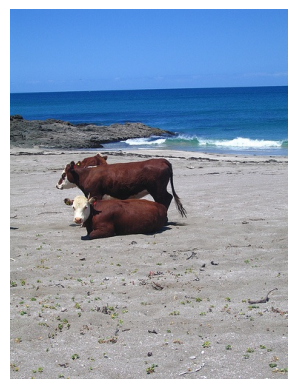

{'image_id': 5,
 'bbox': [58, 202, 241, 295],
 'keypoints': [[73, 225, 1],
  [0, 0, 0],
  [64, 240, 1],
  [84, 214, 1],
  [89, 211, 1],
  [114, 243, 1],
  [0, 0, 0],
  [200, 238, 1],
  [0, 0, 0],
  [0, 0, 0],
  [0, 0, 0],
  [210, 259, 1],
  [0, 0, 0],
  [0, 0, 0],
  [0, 0, 0],
  [0, 0, 0],
  [0, 0, 0],
  [94, 241, 1],
  [117, 214, 1],
  [208, 206, 1]],
 'num_keypoints': 20,
 'category_id': 5}

In [ ]:
plot_image(5)
get_image_annotations(5)

Filtragem de quantos bovinos existem no dataset:

In [ ]:
cattle_obj_list = [annotation for annotation in keypoints_content['annotations'] if annotation['category_id'] == 5]
len(cattle_obj_list)

842

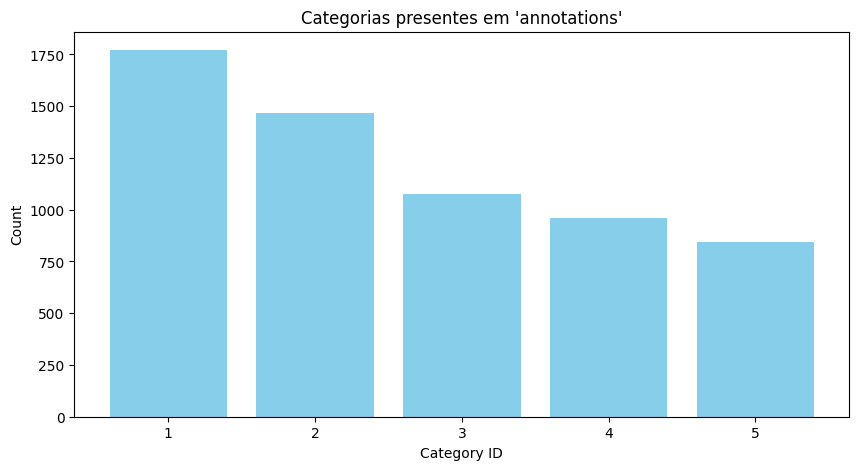

In [ ]:
category_ids = [annotation['category_id'] for annotation in keypoints_content['annotations']]

category_counts = {}
for category_id in category_ids:
    if category_id in category_counts:
        category_counts[category_id] += 1
    else:
        category_counts[category_id] = 1

categories = list(category_counts.keys())
counts = list(category_counts.values())

plt.figure(figsize=(10, 5))
plt.bar(categories, counts, color='skyblue')
plt.xlabel('Category ID')
plt.ylabel('Count')
plt.title('Categorias presentes em \'annotations\'')
plt.xticks(categories)
plt.show()